## TUGAS 2 - IRIS CLASSIFICATION DATASET

### Import Library

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

### Membaca Dataset

In [49]:
data = pd.read_csv("input/iris.csv")
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Membagi Dataset ke Dalam 2 bagian, yakni untuk training dan testing

In [50]:
X = data.iloc[:, [0,1,2, 3]].values
y = data.iloc[:, 4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

Feature scalling dilakukan untuk menormalkan atau menyesuaikan rentang nilai dari fitur-fitur (variabel) dalam kumpulan data. Tujuannya adalah untuk memastikan bahwa fitur-fitur tersebut memiliki skala yang sebanding atau seragam sehingga algoritma machine learning dapat bekerja lebih baik.

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Membuat Model Prediksi Dengan Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Melakukan Training dan Testing

In [53]:
y_pred = classifier.predict(X_test)
probs_y=classifier.predict_proba(X_test)
probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"

### Mencetak Hasil Prediksi

In [54]:
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
Iris-virginica | Iris-virginica | 0.0        | 0.03          | 0.97      
Iris-versicolor | Iris-versicolor | 0.01       | 0.95          | 0.04      
Iris-setosa | Iris-setosa | 1.0        | 0.0           | 0.0       
Iris-virginica | Iris-virginica | 0.0        | 0.08          | 0.92      
Iris-setosa | Iris-setosa | 0.98       | 0.02          | 0.0       
Iris-virginica | Iris-virginica | 0.0        | 0.01          | 0.99      
Iris-setosa | Iris-setosa | 0.98       | 0.02          | 0.0       
Iris-versicolor | Iris-versicolor | 0.01       | 0.71          | 0.28      
Iris-versicolor | Iris-versicolor | 0.0        | 0.73          | 0.27      
Iris-versicolor | Iris-versicolor | 0.02       | 0.89          | 0.08      
Iris-virginica | Iris-virginica | 0.0        | 0.44          | 0.56      
Iris-versicolor | Iris-versicolor | 0.02       | 0.76         

In [55]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

### Visualisasi Hasil Prediksi

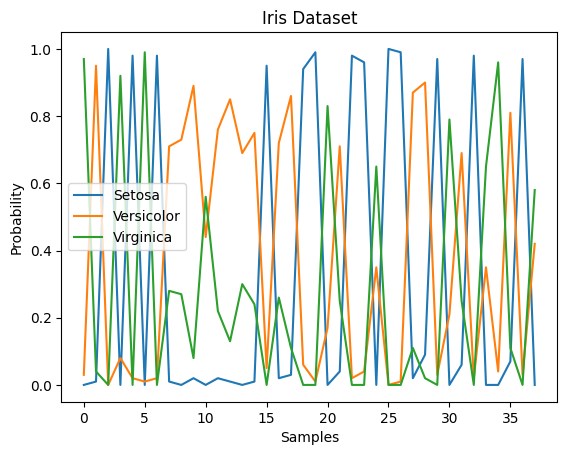

In [56]:
fig, ax = plt.subplots()
ax.set_title('Iris Dataset')
ax.set_xlabel('Samples')
ax.set_ylabel('Probability')
ax.plot(probs_y)
ax.legend(['Setosa', 'Versicolor', 'Virginica'])
plt.show()

### Melihat Akurasi dari Prediksi yang Telah Dilakukan

In [57]:
print("Akurasi : ", classifier.score(X_test, y_test) * 100)

Akurasi :  97.36842105263158


### Membuat Confusion Matrix

In [58]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


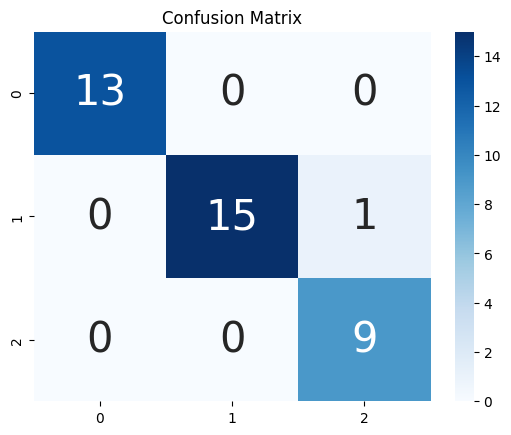

In [59]:
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()